In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pytz import timezone

# Load the CSV file into a DataFrame
df = pd.read_csv('Downloads/parking_availability (6).csv')

# Convert 'Timestamp' column to datetime format and set timezone to UTC
df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.tz_localize('UTC')

# Convert timezone from UTC to LA timezone
la_timezone = timezone('America/Los_Angeles')
df['Timestamp'] = df['Timestamp'].dt.tz_convert(la_timezone)

# Add a new column for the day of the week
df['Day_of_week'] = df['Timestamp'].dt.day_name()

# Split the DataFrame into two based on 'Location'
location1_df = df[df['Location'] == 'Gilman']
location2_df = df[df['Location'] == 'Hopkins']

# Function to plot the proportion of open/total for each parking spot type on a specific day
def plot_proportion_on_day(df, parking_spot_type, day):
    # Filter DataFrame for the specific day
    df_day = df[df['Timestamp'].dt.date == pd.to_datetime(day).date()].copy()
    
    # Round timestamps to the nearest half-hour
    df_day['Rounded_Timestamp'] = df_day['Timestamp'].dt.round('30min')
    
    # Group by rounded timestamps and calculate the mean proportion
    grouped = df_day.groupby('Rounded_Timestamp').apply(lambda x: x[f'{parking_spot_type}_Open'].mean() / x[f'{parking_spot_type}_Total'].mean())
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(grouped.index, grouped.values)
    
    # Format x-axis with appropriate interval and format
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set major ticks to every hour
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=la_timezone))  # Format as Hour:Minute in LA timezone
    
    plt.title(f'Proportion of {parking_spot_type} Open/Total on {day}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Proportion Open')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# # Example usage: Plotting for location1_df on April 29th for parking spot type 'A'
# plot_proportion_on_day(location1_df, 'A', '2024-05-22')


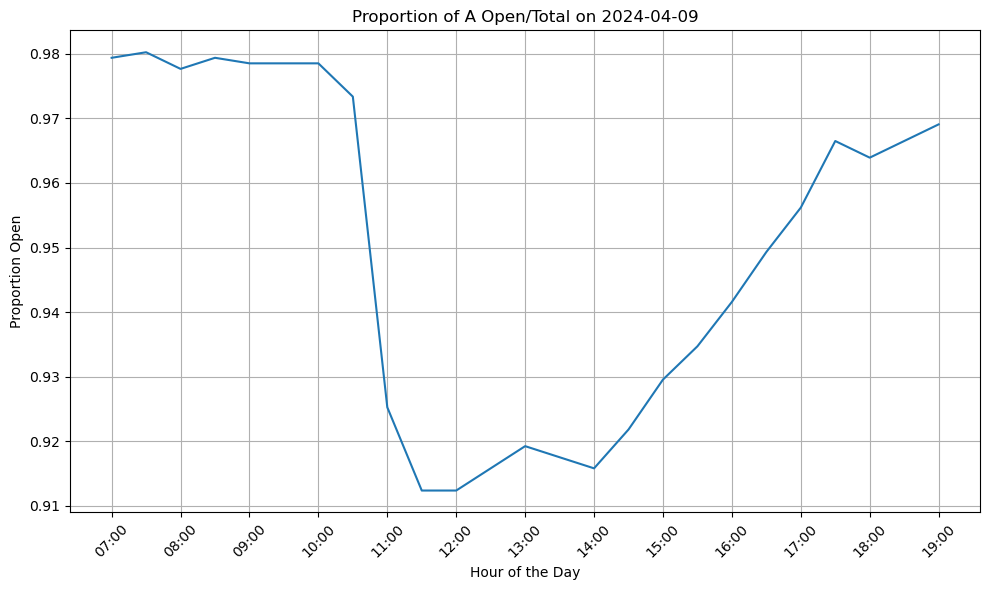

In [43]:
plot_proportion_on_day(location1_df, 'A', '2024-04-09')

In [ ]:
plot_proportion_on_day(location1_df, 'V', '2024-03-31') # 03/30 and 03/31 have a different graph 
plot_proportion_on_day(location1_df, 'V', '2024-04-02') # 04/01 -> 04/06 have data
plot_proportion_on_day(location1_df, 'V', '2024-04-14') # 4/07 -> 4/14 are vacant for V spots
plot_proportion_on_day(location1_df, 'V', '2024-05-06') # 4/15 -> 5/06 have data
plot_proportion_on_day(location1_df, 'V', '2024-05-09') # 5/07 -> 5/09 have data from 14-24
plot_proportion_on_day(location1_df, 'V', '2024-05-20') # 5/10 -> 5/20 have data from 0-11
plot_proportion_on_day(location1_df, 'V', '2024-05-21') # 5/21 has data from 23-20, 22 has 10-20
plot_proportion_on_day(location1_df, 'V', '2024-05-22') # 5/21 has data from 23-20, 22 has 10-20

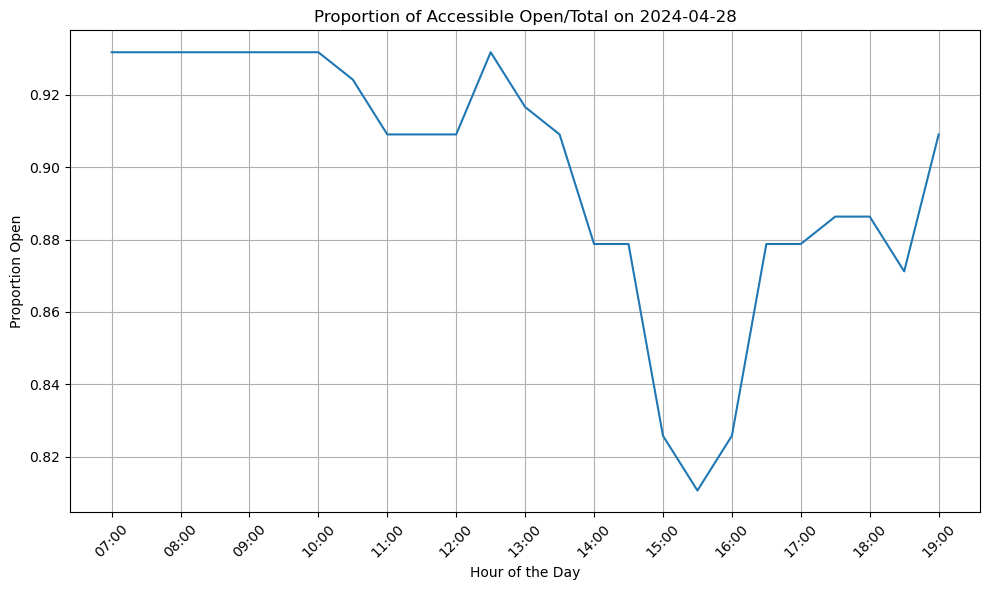

In [50]:
plot_proportion_on_day(location1_df, 'Accessible', '2024-04-28')

In [ ]:
plot_proportion_on_day(location1_df, 'A', '2024-04-07')

In [22]:
# Calculate the proportion of open parking for all types
df['V_Proportion_Open'] = df['V_Open'] / df['V_Total']
df['A_Proportion_Open'] = df['A_Open'] / df['A_Total']
df['B_Proportion_Open'] = df['B_Open'] / df['B_Total']
df['Accessible_Proportion_Open'] = df['Accessible_Open'] / df['Accessible_Total']
df['SR_Proportion_Open'] = df['SR_Open'] / df['SR_Total']

# Add similar calculations for other parking types as needed

# Add a new column for the date
df['Date'] = df['Timestamp'].dt.date

# Group by date and check if 'V' was completely open the entire day
v_completely_open_days = df.groupby('Date').apply(lambda x: (x['V_Proportion_Open'] == 1.0).all())

# Filter dates where 'V' was completely open the entire day
completely_open_dates = v_completely_open_days[v_completely_open_days].index

# Filter the DataFrame for days where 'V' was completely open
v_completely_open_df = df[df['Date'].isin(completely_open_dates)]

# Check if other parking types were completely open on these days
other_parking_types_completely_open = v_completely_open_df.groupby('Date').apply(
    lambda x: {
        'A_Completely_Open': (x['A_Proportion_Open'] == 1.0).all(),
        'B_Completely_Open': (x['B_Proportion_Open'] == 1.0).all(),
        # Add similar checks for other parking types as needed
    }
)

# Display the results
print(other_parking_types_completely_open)


Empty DataFrame
Columns: [Timestamp, Location, A_Total, A_Open, B_Total, B_Open, V_Total, V_Open, Accessible_Total, Accessible_Open, SR_Total, SR_Open, Day_of_week, Hour_of_day, Proportion_Open, Week_Number, V_Proportion_Open, A_Proportion_Open, B_Proportion_Open, Accessible_Proportion_Open, SR_Proportion_Open, Date]
Index: []

[0 rows x 22 columns]


In [37]:
# Separate the data by parking type
gilman_df = df[df['Location'] == 'Gilman']
hopkins_df = df[df['Location'] == 'Hopkins']

# Function to check if a parking type was completely open for a day
def check_full_availability(df, parking_type):
    return df.groupby('Date').apply(lambda x: (x[f'{parking_type}_Proportion_Open'] == 1.0).all())

# Check for full availability for each parking type
completely_open_gilman = check_full_availability(gilman_df, 'V')
completely_open_hopkins = check_full_availability(hopkins_df, 'V')

# # Display the completely open days for each parking type
# print("Completely Open Days for Gilman Parking V:")
# print(completely_open_gilman[completely_open_gilman])

# print("\nCompletely Open Days for Hopkins Parking V:")
# print(completely_open_hopkins[completely_open_hopkins])

# # Check for full availability for each parking type
# completely_open_gilman = check_full_availability(gilman_df, 'A')
# completely_open_hopkins = check_full_availability(hopkins_df, 'A')

# # Display the completely open days for each parking type
# print("Completely Open Days for Gilman Parking A:")
# print(completely_open_gilman[completely_open_gilman])

# print("\nCompletely Open Days for Hopkins Parking A:")
# print(completely_open_hopkins[completely_open_hopkins])

# # Check for full availability for each parking type
# completely_open_gilman = check_full_availability(gilman_df, 'B')
# completely_open_hopkins = check_full_availability(hopkins_df, 'B')

# # Display the completely open days for each parking type
# print("Completely Open Days for Gilman Parking B:")
# print(completely_open_gilman[completely_open_gilman])

# print("\nCompletely Open Days for Hopkins Parking B:")
# print(completely_open_hopkins[completely_open_hopkins])

# # Check for full availability for each parking type
# completely_open_gilman = check_full_availability(gilman_df, 'SR')
completely_open_hopkins = check_full_availability(hopkins_df, 'SR')

# Display the completely open days for each parking type
print("Completely Open Days for Gilman Parking SR:")
print(completely_open_gilman[completely_open_gilman])

# print("\nCompletely Open Days for Hopkins Parking SR:")
# print(completely_open_hopkins[completely_open_hopkins])

# Check for full availability for each parking type
completely_open_gilman = check_full_availability(gilman_df, 'Accessible')
completely_open_hopkins = check_full_availability(hopkins_df, 'Accessible')

# Display the completely open days for each parking type
print("Completely Open Days for Gilman Parking Accessible:")
print(completely_open_gilman[completely_open_gilman])

# print("\nCompletely Open Days for Hopkins Parking Accessible:")
# print(completely_open_hopkins[completely_open_hopkins])

Completely Open Days for Gilman Parking SR:
Date
2024-04-07    True
2024-04-08    True
2024-04-09    True
2024-04-10    True
2024-04-11    True
2024-04-12    True
2024-04-13    True
2024-04-14    True
dtype: bool
Completely Open Days for Gilman Parking Accessible:
Date
2024-03-30    True
2024-04-07    True
2024-04-08    True
2024-04-09    True
2024-04-10    True
2024-04-11    True
2024-04-12    True
2024-04-13    True
2024-04-14    True
dtype: bool


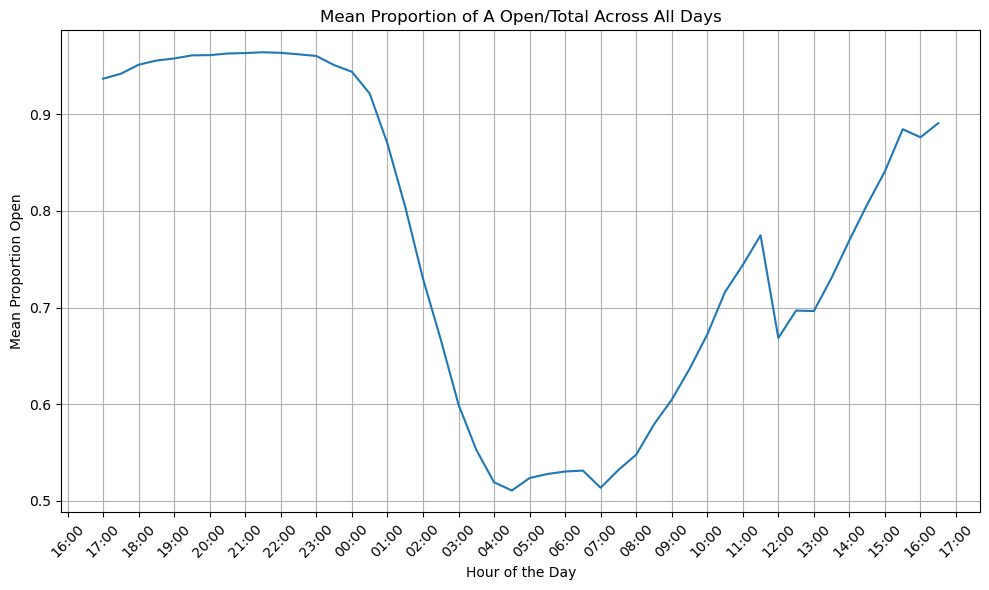

In [52]:
# Function to plot the mean proportion of open/total for each parking spot type across all days
def plot_mean_proportion(df, parking_spot_type):
    # Round timestamps to the nearest half-hour
    df = df.copy()
    df['Rounded_Timestamp'] = df['Timestamp'].dt.floor('30T')
    
    # Extract the time part of the datetime
    df['Time_of_day'] = df['Rounded_Timestamp'].dt.time
    
    # Group by the time of day and calculate the mean proportion across all days
    grouped = df.groupby('Time_of_day').apply(lambda x: x[f'{parking_spot_type}_Open'].mean() / x[f'{parking_spot_type}_Total'].mean())
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    times = [pd.Timestamp.combine(pd.Timestamp('today'), t) for t in grouped.index]
    ax.plot(times, grouped.values)
    
    # Format x-axis with appropriate interval and format
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set major ticks to every hour
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=la_timezone))  # Format as Hour:Minute in LA timezone
    
    plt.title(f'Mean Proportion of {parking_spot_type} Open/Total Across All Days')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Mean Proportion Open')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage: Plotting for location1_df for parking spot type 'A'
plot_mean_proportion(location1_df, 'A')

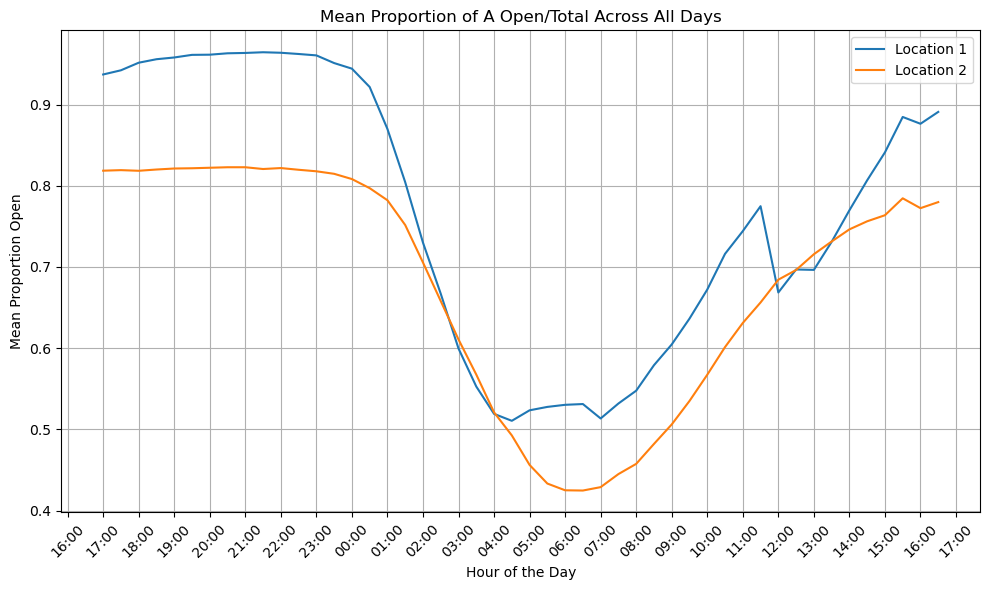

In [53]:
# Function to plot the mean proportion of open/total for each parking spot type across all days for multiple locations
def plot_mean_proportion_multi(locations_data, parking_spot_type):
    la_timezone = timezone('America/Los_Angeles')

    plt.figure(figsize=(10, 6))
    
    for location_name, df in locations_data.items():
        # Round timestamps to the nearest half-hour
        df = df.copy()
        df['Rounded_Timestamp'] = df['Timestamp'].dt.floor('30T')
        
        # Extract the time part of the datetime
        df['Time_of_day'] = df['Rounded_Timestamp'].dt.time
        
        # Group by the time of day and calculate the mean proportion across all days
        grouped = df.groupby('Time_of_day').apply(lambda x: x[f'{parking_spot_type}_Open'].mean() / x[f'{parking_spot_type}_Total'].mean())
        
        # Plotting
        times = [pd.Timestamp.combine(pd.Timestamp('today'), t) for t in grouped.index]
        plt.plot(times, grouped.values, label=location_name)
    
    # Format x-axis with appropriate interval and format
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set major ticks to every hour
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=la_timezone))  # Format as Hour:Minute in LA timezone
    
    plt.title(f'Mean Proportion of {parking_spot_type} Open/Total Across All Days')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Mean Proportion Open')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage: Plotting for both location1_df and location2_df for parking spot type 'A'
locations_data = {
    'Location 1': location1_df,
    'Location 2': location2_df
}

plot_mean_proportion_multi(locations_data, 'A')

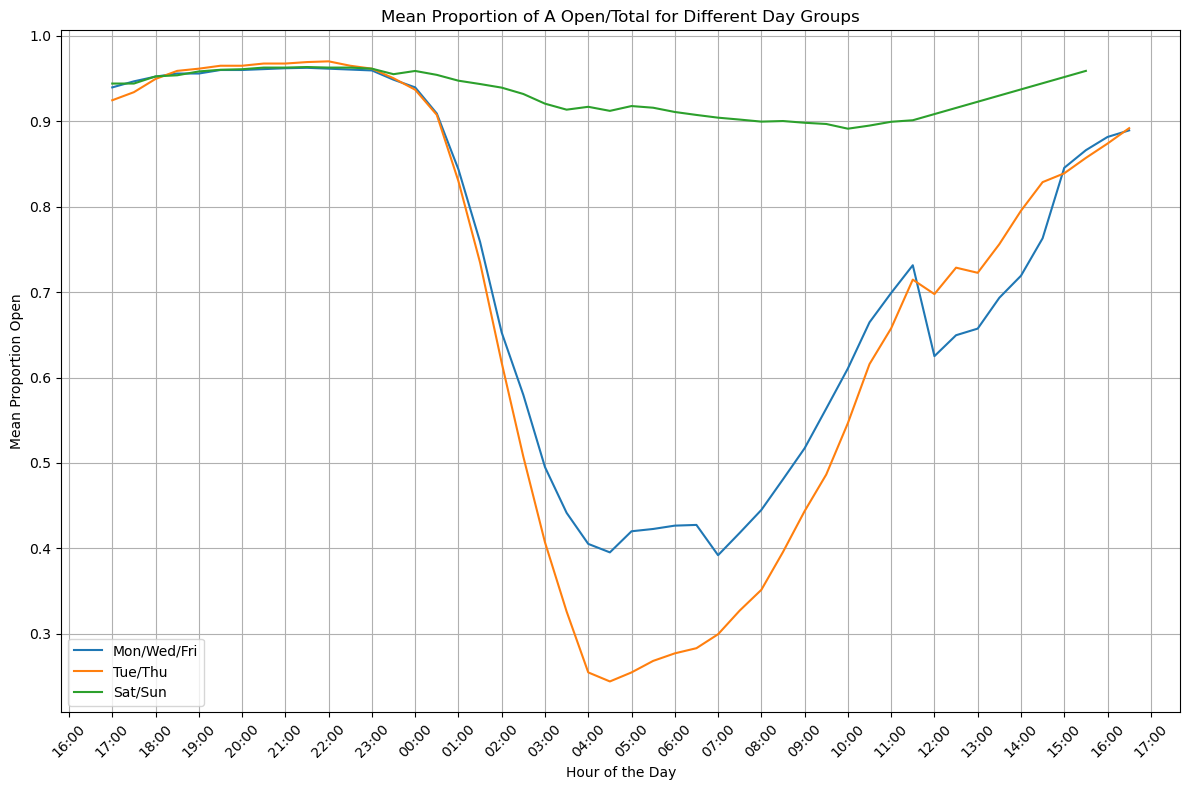

In [3]:
# Function to plot the mean proportion of open/total for each parking spot type across specified days
def plot_mean_proportion_grouped(df, parking_spot_type, group_name, days):
    # Filter DataFrame for the specified days
    df_group = df.loc[df['Day_of_week'].isin(days)].copy()
    
    # Round timestamps to the nearest half-hour
    df_group['Rounded_Timestamp'] = df_group['Timestamp'].dt.floor('30T')
    
    # Extract the time part of the datetime
    df_group['Time_of_day'] = df_group['Rounded_Timestamp'].dt.time
    
    # Group by the time of day and calculate the mean proportion across all specified days
    grouped = df_group.groupby('Time_of_day').apply(lambda x: x[f'{parking_spot_type}_Open'].mean() / x[f'{parking_spot_type}_Total'].mean())
    
    # Plotting
    times = [pd.Timestamp.combine(pd.Timestamp('today'), t) for t in grouped.index]
    plt.plot(times, grouped.values, label=group_name)

# Define the groups
groupings = {
    'Mon/Wed/Fri': ['Monday', 'Wednesday', 'Friday'],
    'Tue/Thu': ['Tuesday', 'Thursday'],
    'Sat/Sun': ['Saturday', 'Sunday']
}

# Plot for each group
plt.figure(figsize=(12, 8))
for group_name, days in groupings.items():
    plot_mean_proportion_grouped(location1_df, 'A', group_name, days)

# Format x-axis with appropriate interval and format
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set major ticks to every hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=la_timezone))  # Format as Hour:Minute in LA timezone

plt.title('Mean Proportion of A Open/Total for Different Day Groups')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Proportion Open')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

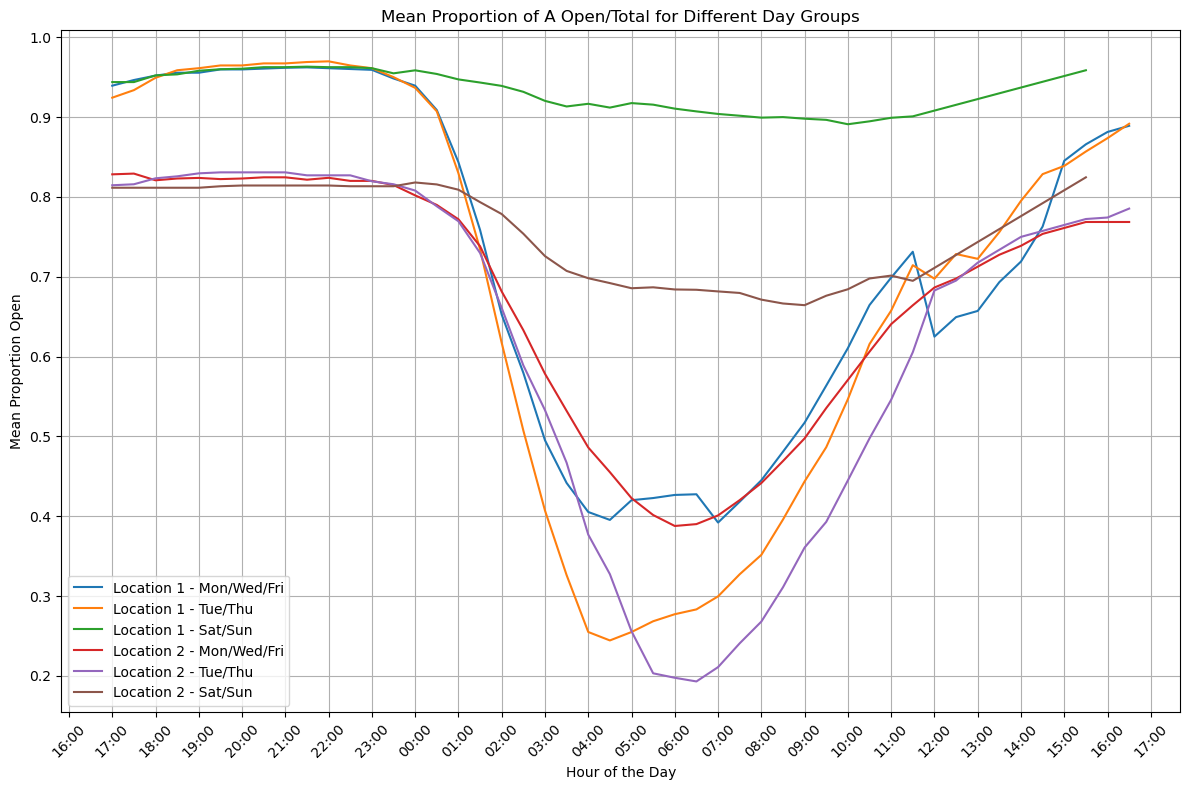

In [4]:
# Function to plot the mean proportion of open/total for each parking spot type across specified days
def plot_mean_proportion_grouped(df, parking_spot_type, group_name, days):
    # Filter DataFrame for the specified days
    df_group = df.loc[df['Day_of_week'].isin(days)].copy()
    
    # Round timestamps to the nearest half-hour
    df_group['Rounded_Timestamp'] = df_group['Timestamp'].dt.floor('30T')
    
    # Extract the time part of the datetime
    df_group['Time_of_day'] = df_group['Rounded_Timestamp'].dt.time
    
    # Group by the time of day and calculate the mean proportion across all specified days
    grouped = df_group.groupby('Time_of_day').apply(lambda x: x[f'{parking_spot_type}_Open'].mean() / x[f'{parking_spot_type}_Total'].mean())
    
    # Plotting
    times = [pd.Timestamp.combine(pd.Timestamp('today'), t) for t in grouped.index]
    plt.plot(times, grouped.values, label=group_name)

# Define the groups
groupings = {
    'Mon/Wed/Fri': ['Monday', 'Wednesday', 'Friday'],
    'Tue/Thu': ['Tuesday', 'Thursday'],
    'Sat/Sun': ['Saturday', 'Sunday']
}

# Plot for each group for multiple locations
locations_data = {
    'Location 1': location1_df,
    'Location 2': location2_df
}

la_timezone = timezone('America/Los_Angeles')

plt.figure(figsize=(12, 8))

for location_name, df in locations_data.items():
    for group_name, days in groupings.items():
        plot_mean_proportion_grouped(df, 'A', f'{location_name} - {group_name}', days)

# Format x-axis with appropriate interval and format
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set major ticks to every hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=la_timezone))  # Format as Hour:Minute in LA timezone

plt.title('Mean Proportion of A Open/Total for Different Day Groups')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Proportion Open')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Function to plot the mean proportion of open/total for each parking spot type across specified days
def plot_mean_proportion_grouped(df, parking_spot_type, group_name, days):
    # Filter DataFrame for the specified days
    df_group = df.loc[df['Day_of_week'].isin(days)].copy()
    
    # Round timestamps to the nearest half-hour
    df_group['Rounded_Timestamp'] = df_group['Timestamp'].dt.floor('30T')
    
    # Extract the time part of the datetime
    df_group['Time_of_day'] = df_group['Rounded_Timestamp'].dt.time
    
    # Group by the time of day and calculate the mean proportion across all specified days
    grouped = df_group.groupby('Time_of_day').apply(lambda x: x[f'{parking_spot_type}_Open'].mean() / x[f'{parking_spot_type}_Total'].mean())
    
    # Plotting
    times = [pd.Timestamp.combine(pd.Timestamp('today'), t) for t in grouped.index]
    plt.plot(times, grouped.values, label=group_name)

# Define the groups
comparisons = [
    {'name': 'Mon vs Wed vs Fri', 'days': {'Monday': ['Monday'], 'Wednesday': ['Wednesday'], 'Friday': ['Friday']}},
    {'name': 'Tue vs Thu', 'days': {'Tuesday': ['Tuesday'], 'Thursday': ['Thursday']}},
    {'name': 'Sat vs Sun', 'days': {'Saturday': ['Saturday'], 'Sunday': ['Sunday']}}
]

locations_data = {
    'Location 1': location1_df,
    'Location 2': location2_df
}

la_timezone = timezone('America/Los_Angeles')

# Plotting
for comparison in comparisons:
    plt.figure(figsize=(12, 8))
    for location_name, df in locations_data.items():
        for group_name, days in comparison['days'].items():
            plot_mean_proportion_grouped(df, 'A', f'{location_name} - {group_name}', days)

    # Format x-axis with appropriate interval and format
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set major ticks to every hour
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=la_timezone))  # Format as Hour:Minute in LA timezone

    plt.title(f'Mean Proportion of A Open/Total for {comparison["name"]}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Mean Proportion Open')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Function to plot the mean proportion of open/total for each parking spot type across specified date ranges
def plot_mean_proportion_by_weeks(df, parking_spot_type, group_name, start_date, end_date):
    # Ensure the timestamps are timezone-aware
    df['Timestamp'] = df['Timestamp'].dt.tz_convert('America/Los_Angeles')
    
    # Filter DataFrame for the specified date range
    df_group = df.loc[(df['Timestamp'] >= start_date) & (df['Timestamp'] < end_date)].copy()
    
    # Round timestamps to the nearest half-hour
    df_group['Rounded_Timestamp'] = df_group['Timestamp'].dt.floor('30T')
    
    # Extract the time part of the datetime
    df_group['Time_of_day'] = df_group['Rounded_Timestamp'].dt.time
    
    # Group by the time of day and calculate the mean proportion across all specified days
    grouped = df_group.groupby('Time_of_day').apply(lambda x: x[f'{parking_spot_type}_Open'].mean() / x[f'{parking_spot_type}_Total'].mean())
    
    # Plotting
    times = [pd.Timestamp.combine(pd.Timestamp('today'), t) for t in grouped.index]
    plt.plot(times, grouped.values, label=group_name)

# Define the date ranges for the week groups
date_ranges = {
    'Weeks 1-3': ('2024-03-31', '2024-04-21'),
    'Weeks 5-7': ('2024-04-28', '2024-05-19'),
    'Weeks 8-10': ('2024-05-26', '2024-06-16')
}

# Convert date strings to pandas timestamps with timezone
for key in date_ranges:
    start, end = date_ranges[key]
    date_ranges[key] = (pd.Timestamp(start, tz='America/Los_Angeles'), pd.Timestamp(end, tz='America/Los_Angeles'))

locations_data = {
    'Location 1': location1_df,
    'Location 2': location2_df
}

la_timezone = timezone('America/Los_Angeles')

# Plotting
plt.figure(figsize=(12, 8))
for location_name, df in locations_data.items():
    for group_name, (start_date, end_date) in date_ranges.items():
        plot_mean_proportion_by_weeks(df, 'A', f'{location_name} - {group_name}', start_date, end_date)

# Format x-axis with appropriate interval and format
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set major ticks to every hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=la_timezone))  # Format as Hour:Minute in LA timezone

plt.title('Mean Proportion of A Open/Total for Different Week Groups')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Proportion Open')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Function to plot the mean proportion of open/total for each parking spot type across specified date ranges
def plot_mean_proportion_by_weeks(df, parking_spot_type, group_name, start_date, end_date):
    # Ensure the timestamps are timezone-aware
    df['Timestamp'] = df['Timestamp'].dt.tz_convert('America/Los_Angeles')
    
    # Filter DataFrame for the specified date range
    df_group = df.loc[(df['Timestamp'] >= start_date) & (df['Timestamp'] < end_date)].copy()
    
    # Round timestamps to the nearest half-hour
    df_group['Rounded_Timestamp'] = df_group['Timestamp'].dt.floor('30T')
    
    # Extract the time part of the datetime
    df_group['Time_of_day'] = df_group['Rounded_Timestamp'].dt.time
    
    # Group by the time of day and calculate the mean proportion across all specified days
    grouped = df_group.groupby('Time_of_day').apply(lambda x: x[f'{parking_spot_type}_Open'].mean() / x[f'{parking_spot_type}_Total'].mean())
    
    # Plotting
    times = [pd.Timestamp.combine(pd.Timestamp('today'), t) for t in grouped.index]
    plt.plot(times, grouped.values, label=group_name)

# Define the date ranges for the week groups
date_ranges = {
    'Weeks 1-3': ('2024-03-31', '2024-04-21'),
    'Weeks 5-7': ('2024-04-28', '2024-05-19'),
    'Weeks 8-10': ('2024-05-26', '2024-06-16')
}

# Convert date strings to pandas timestamps with timezone
for key in date_ranges:
    start, end = date_ranges[key]
    date_ranges[key] = (pd.Timestamp(start, tz='America/Los_Angeles'), pd.Timestamp(end, tz='America/Los_Angeles'))

locations_data = {
    'Location 1': location1_df,
    'Location 2': location2_df
}

parking_spot_types = ['A', 'B', 'V']  # List of parking spot types
la_timezone = timezone('America/Los_Angeles')

# Plotting for each parking spot type
for parking_spot_type in parking_spot_types:
    plt.figure(figsize=(12, 8))
    for location_name, df in locations_data.items():
        for group_name, (start_date, end_date) in date_ranges.items():
            plot_mean_proportion_by_weeks(df, parking_spot_type, f'{location_name} - {group_name}', start_date, end_date)

    # Format x-axis with appropriate interval and format
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set major ticks to every hour
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=la_timezone))  # Format as Hour:Minute in LA timezone

    plt.title(f'Mean Proportion of {parking_spot_type} Open/Total for Different Week Groups')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Mean Proportion Open')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

Paired t-test statistic: 3.8733130073077437
p-value: 0.0007701484026261607


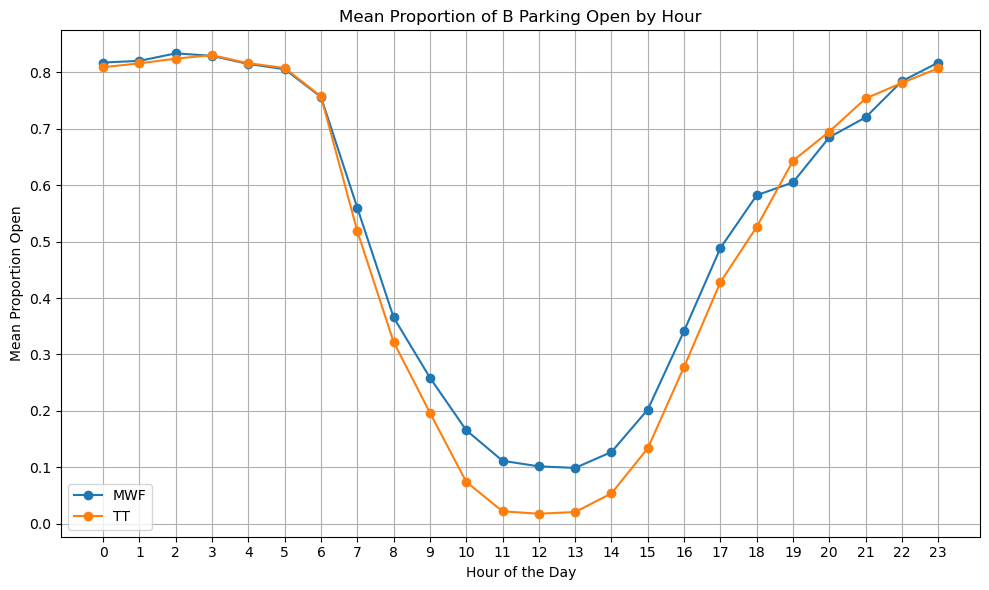

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pytz import timezone

# Load the CSV file into a DataFrame
df = pd.read_csv('Downloads/parking_availability (6).csv')

# Convert 'Timestamp' column to datetime format and set timezone to UTC
df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.tz_localize('UTC')

# Convert timezone from UTC to LA timezone
la_timezone = timezone('America/Los_Angeles')
df['Timestamp'] = df['Timestamp'].dt.tz_convert(la_timezone)

# Add a new column for the day of the week and hour of the day
df['Day_of_week'] = df['Timestamp'].dt.day_name()
df['Hour_of_day'] = df['Timestamp'].dt.hour

# Assuming the correct column names for the open and total parking spots
parking_type = 'B'  # Change this to 'B', 'V', etc. for other parking types
open_column = f'{parking_type}_Open'
total_column = f'{parking_type}_Total'

# Calculate the proportion of open parking
df['Proportion_Open'] = df[open_column] / df[total_column]

# Filter data for MWF and TT
mwf_df = df[df['Day_of_week'].isin(['Monday', 'Wednesday', 'Friday'])]
tt_df = df[df['Day_of_week'].isin(['Tuesday', 'Thursday'])]

# Group by hour and calculate mean proportion open
mwf_means = mwf_df.groupby('Hour_of_day')['Proportion_Open'].mean()
tt_means = tt_df.groupby('Hour_of_day')['Proportion_Open'].mean()

# Align the data by hour
aligned_data = pd.DataFrame({
    'MWF': mwf_means,
    'TT': tt_means
}).dropna()

# Perform the paired t-test
t_stat, p_value = stats.ttest_rel(aligned_data['MWF'], aligned_data['TT'])

# Print the results of the t-test
print(f'Paired t-test statistic: {t_stat}')
print(f'p-value: {p_value}')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(aligned_data.index, aligned_data['MWF'], label='MWF', marker='o')
plt.plot(aligned_data.index, aligned_data['TT'], label='TT', marker='o')
plt.title(f'Mean Proportion of {parking_type} Parking Open by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Proportion Open')
plt.xticks(aligned_data.index)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Paired t-test statistic: 4.324468091945182
p-value: 0.00036543288886829056


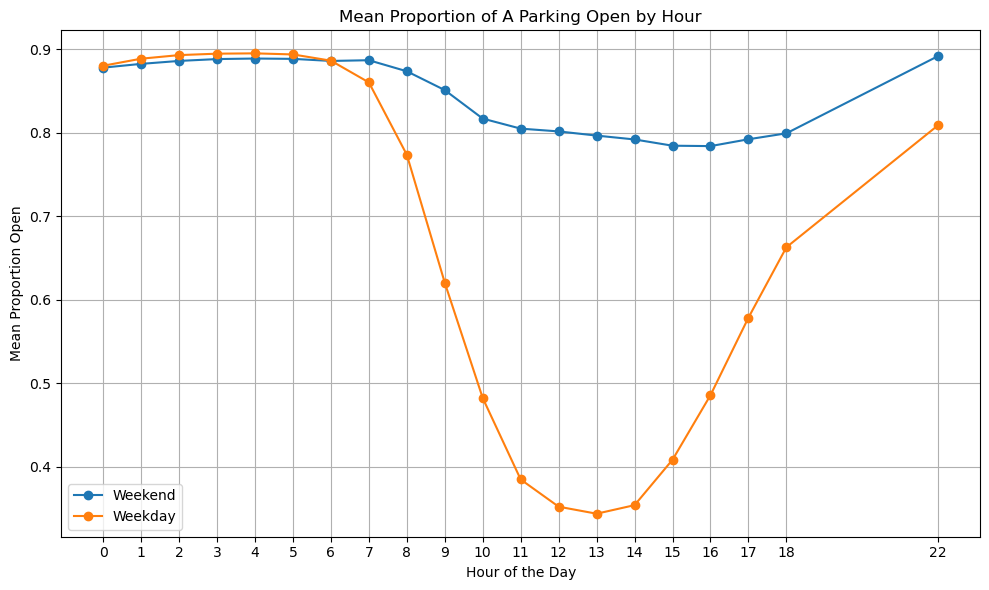

In [17]:
# Load the CSV file into a DataFrame
df = pd.read_csv('Downloads/parking_availability (6).csv')

# Convert 'Timestamp' column to datetime format and set timezone to UTC
df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.tz_localize('UTC')

# Convert timezone from UTC to LA timezone
la_timezone = timezone('America/Los_Angeles')
df['Timestamp'] = df['Timestamp'].dt.tz_convert(la_timezone)

# Add a new column for the day of the week and hour of the day
df['Day_of_week'] = df['Timestamp'].dt.day_name()
df['Hour_of_day'] = df['Timestamp'].dt.hour

# Assuming the correct column names for the open and total parking spots
parking_type = 'A'  # Change this to 'B', 'V', etc. for other parking types
open_column = f'{parking_type}_Open'
total_column = f'{parking_type}_Total'

# Calculate the proportion of open parking
df['Proportion_Open'] = df[open_column] / df[total_column]

# Filter data for weekends and weekdays
weekend_df = df[df['Day_of_week'].isin(['Saturday', 'Sunday'])]
weekday_df = df[df['Day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Group by hour and calculate mean proportion open
weekend_means = weekend_df.groupby('Hour_of_day')['Proportion_Open'].mean()
weekday_means = weekday_df.groupby('Hour_of_day')['Proportion_Open'].mean()

# Align the data by hour
aligned_data = pd.DataFrame({
    'Weekend': weekend_means,
    'Weekday': weekday_means
}).dropna()

# Perform the paired t-test
t_stat, p_value = stats.ttest_rel(aligned_data['Weekend'], aligned_data['Weekday'])

# Print the results of the t-test
print(f'Paired t-test statistic: {t_stat}')
print(f'p-value: {p_value}')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(aligned_data.index, aligned_data['Weekend'], label='Weekend', marker='o')
plt.plot(aligned_data.index, aligned_data['Weekday'], label='Weekday', marker='o')
plt.title(f'Mean Proportion of {parking_type} Parking Open by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Proportion Open')
plt.xticks(aligned_data.index)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ANOVA F-statistic: 2.3611810179230113
p-value: 0.11005214382758623


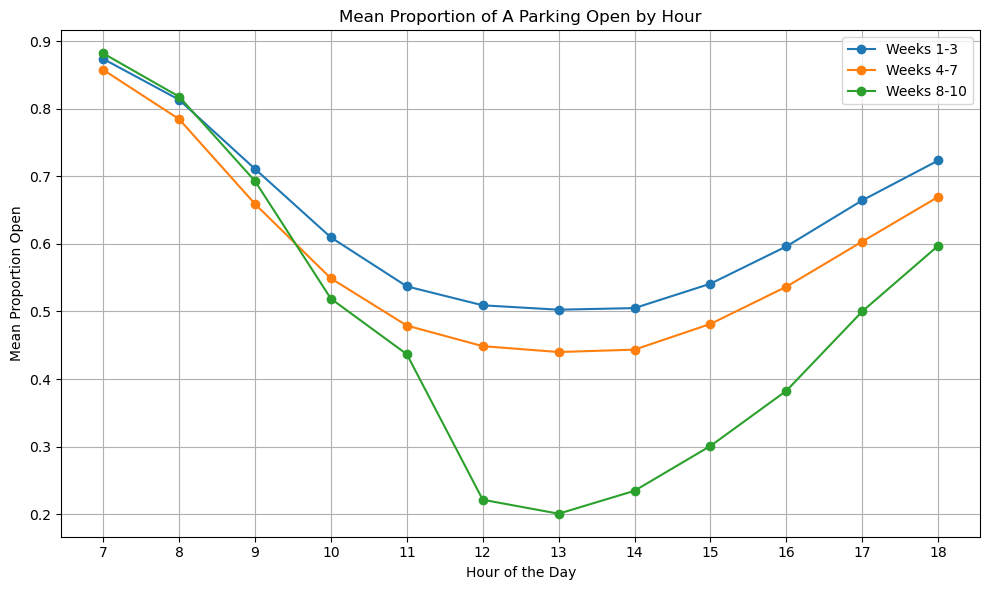

In [20]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pytz import timezone

# Load the CSV file into a DataFrame
df = pd.read_csv('Downloads/parking_availability (6).csv')

# Convert 'Timestamp' column to datetime format and set timezone to UTC
df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.tz_localize('UTC')

# Convert timezone from UTC to LA timezone
la_timezone = timezone('America/Los_Angeles')
df['Timestamp'] = df['Timestamp'].dt.tz_convert(la_timezone)

# Add a new column for the day of the week and hour of the day
df['Day_of_week'] = df['Timestamp'].dt.day_name()
df['Hour_of_day'] = df['Timestamp'].dt.hour

# Assuming the correct column names for the open and total parking spots
parking_type = 'A'  # Change this to 'B', 'V', etc. for other parking types
open_column = f'{parking_type}_Open'
total_column = f'{parking_type}_Total'

# Calculate the proportion of open parking
df['Proportion_Open'] = df[open_column] / df[total_column]

# Define the starting date and make it timezone-aware
start_date = pd.to_datetime('2024-03-31').tz_localize(la_timezone)

# Function to get week number relative to the start date
def get_week_number(timestamp):
    return (timestamp - start_date).days // 7 + 1

# Add a new column for the week number
df['Week_Number'] = df['Timestamp'].apply(get_week_number)

# Filter data by week ranges
weeks_1_3_df = df[df['Week_Number'].between(1, 3)]
weeks_4_7_df = df[df['Week_Number'].between(4, 7)]
weeks_8_10_df = df[df['Week_Number'].between(8, 10)]

# Group by hour and calculate mean proportion open
weeks_1_3_means = weeks_1_3_df.groupby('Hour_of_day')['Proportion_Open'].mean()
weeks_4_7_means = weeks_4_7_df.groupby('Hour_of_day')['Proportion_Open'].mean()
weeks_8_10_means = weeks_8_10_df.groupby('Hour_of_day')['Proportion_Open'].mean()

# Align the data by hour
aligned_data = pd.DataFrame({
    'Weeks 1-3': weeks_1_3_means,
    'Weeks 4-7': weeks_4_7_means,
    'Weeks 8-10': weeks_8_10_means
}).dropna()

# Perform ANOVA
f_stat, p_value = stats.f_oneway(aligned_data['Weeks 1-3'], aligned_data['Weeks 4-7'], aligned_data['Weeks 8-10'])

# Print the results of the ANOVA test
print(f'ANOVA F-statistic: {f_stat}')
print(f'p-value: {p_value}')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(aligned_data.index, aligned_data['Weeks 1-3'], label='Weeks 1-3', marker='o')
plt.plot(aligned_data.index, aligned_data['Weeks 4-7'], label='Weeks 4-7', marker='o')
plt.plot(aligned_data.index, aligned_data['Weeks 8-10'], label='Weeks 8-10', marker='o')
plt.title(f'Mean Proportion of {parking_type} Parking Open by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Proportion Open')
plt.xticks(aligned_data.index)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
